In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Imorting Dataset

In [2]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

Importing Packages

Mentioning the labels for different dataset

In [3]:
# Getting labels of training data
labels = os.listdir('/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train')
labels

['rottenoranges',
 'rottenapples',
 'rottenbanana',
 'freshoranges',
 'freshbanana',
 'freshapples']

Providing data directory to DATADIR variable

In [4]:
DATADIR= '/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train'
IMG_SIZE=100

Sample Image Example

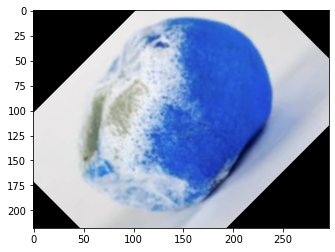

In [5]:
import cv2
import matplotlib.pyplot as plt
for category in labels:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

Preprocessing Data

In [ ]:
training_data=[]
def create_training_data():
    for category in labels:
        path=os.path.join(DATADIR, category)
        class_num=labels.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()         

In [ ]:
print(len(training_data))

10901


Storing Training Length 

In [ ]:
lenofimage = len(training_data)

For training an image, converting the image to a array form
As SVM takes 2D input to train, X type (training_data_length , -1)

In [ ]:
import numpy as np

X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [ ]:
X.shape

(10901, 30000)

flattening the array

In [ ]:
X = X/255.0

Example of flattened array

In [ ]:
X[1]

array([0., 0., 0., ..., 0., 0., 0.])

y should be in array form compulsory.

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(10901,)

Ready with our dependent and independent features.
Applying train_test_split on our data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

(8175, 30000)

In [ ]:
X_test.shape

(2726, 30000)

In [ ]:
y_train.shape

(8175,)

In [ ]:
y_test.shape

(2726,)

Fitting data in KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Making predictions in the test datasets

In [ ]:
y_pred = knn.predict(X_test)

y_pred

array([5, 5, 1, ..., 1, 1, 2])

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is :-")
print(classification_report(y_test, y_pred))

Accuracy on unknown data is :-
              precision    recall  f1-score   support

           0       0.59      0.67      0.63       418
           1       0.59      0.77      0.67       590
           2       0.97      0.67      0.80       531
           3       0.70      0.81      0.75       335
           4       0.86      0.83      0.84       399
           5       0.87      0.67      0.76       453

    accuracy                           0.73      2726
   macro avg       0.76      0.74      0.74      2726
weighted avg       0.77      0.73      0.74      2726



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[281  69   2  46  13   7]
 [ 50 455   0  56   0  29]
 [ 51  84 358   0  36   2]
 [ 31  29   1 270   3   1]
 [ 33  21   7   3 330   5]
 [ 28 107   0  13   2 303]]


In [ ]:
# calculating the overall acuracy using knn.score
acc=knn.score(X_test, y_test)
print(f'accuracy from knn.score = {acc:.4}') # {acc:.4} will include 4 digits after decimal

# calculating the overall acuracy using metrics.accuracy_score
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print(f'accuracy from metrics.accuracy_score = {acc:.4}') # {acc:.4} will include 4 digits after decimal

accuracy from knn.score = 0.7326
accuracy from metrics.accuracy_score = 0.7326


In [ ]:
# calculating the balanced accuracy using metrics.accuracy_score
acc=metrics.accuracy_score(y_test, y_pred)
print(f'accuracy = {acc:.4}') # {acc:.4} will include 4 digits after decimal

accuracy = 0.7326


Formulating Classification Report

In [ ]:
import pandas as pd

result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})

In [ ]:
result

,original,predicted
0,5,5
1,5,5
2,5,1
3,5,5
4,1,1
...,...,...
2721,2,1
2722,5,5
2723,1,1
2724,1,1


In [ ]:
# original & predicted value for all rows present in dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

result

,original,predicted
0,5,5
1,5,5
2,5,1
3,5,5
4,1,1
5,0,0
6,1,3
7,2,2
8,2,0
9,1,3


In [ ]:
#curves 
import numpy as np
import matplotlib.pyplot as plt

no_neighbors = np.arange(1, 9)

train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('KNN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()